Diseñar una clase en Python que reciba el codigo binario de un QPSK (00,01,10,11), la frecuencia de la portadora y la frecuencia de muestreo. Con un metodo `generarSenal` retorna un periodo de la senal modulada (vector de amplitudes y tiempos). Construir un metodo que reciba una senal y devuelva el codigo binario correspondiente (pista: usar el producto punto).
$$ s(t) = \cos(2\pi f_ct+\theta)
$$

In [12]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np
class QPSK:
  def __init__(self, fc, fs):
    self.fc = fc #frecuencia portadora
    self.fs = fs #frecuencia muestreo
    self.codDic = {'00':45,'01':-45,'10':135,'11':-135}

  def generarSenal(self, codigo):
    Tc = 1/self.fc
    Ts = 1/self.fs
    t = np.arange(0,Tc+Ts,Ts)
    senal = np.cos(2*np.pi*self.fc*t+np.radians(self.codDic[codigo]))
    return t, senal

  def codBin(self, senal):
    senalSin = np.sin(2*np.pi*self.fc*t)
    senalCos = np.cos(2*np.pi*self.fc*t)
    punto = np.sum(senal*senalCos)
    signo = -1*np.sign(np.sum(s*senalSin))
    g = np.degrees(np.arccos(punto/(np.linalg.norm(s)*np.linalg.norm(senalCos))))
    if (signo==1.0 and g<90):
      return '00'
    if (signo==1.0 and g>90):
      return '10'
    if (signo==-1.0 and g<90):
      return '01'
    if (signo==-1.0 and g>90):
      return '11'

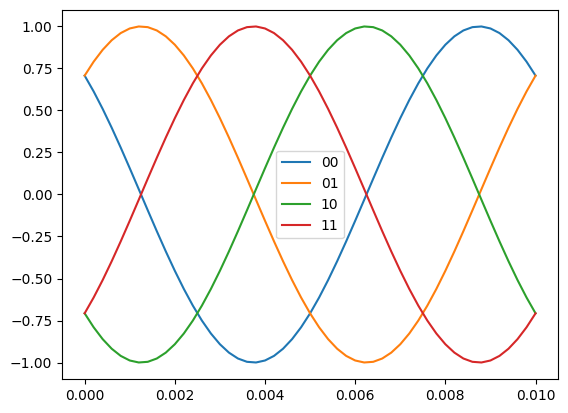

In [37]:
q1 = QPSK(100, 5000)
listCod = ['00','01','10','11']
for cod in listCod:
  t,s = q1.generarSenal(cod)
  plt.plot(t,s)
plt.legend(listCod)

$$ \frac{a \cdot b}{|| a ||\ ||b||} =  \cos(\theta)
$$

In [38]:
for cod in listCod:
  t,s = q1.generarSenal(cod)
  print(q1.codBin(s))

00
01
10
11
